In [54]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Loading our dataset
df = pd.read_csv('C:/Users/Kofidence/Desktop/wfp_food_prices_uga.csv')

In [3]:
# Explanatory data analysis
# the first 5 rows of the dataset
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Busia,Samia-bugwe,Busia,0.467,34.09,cereals and tubers,Maize,KG,actual,Wholesale,UGX,298.4,0.1641
2,2006-01-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Maize,KG,actual,Wholesale,UGX,345.42,0.19
3,2006-01-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Rice,KG,actual,Wholesale,UGX,1013.4,0.5573
4,2006-01-15,Lira,Lira Municipality,Lira,2.235,32.909722,cereals and tubers,Maize,KG,actual,Wholesale,UGX,247.76,0.1362


In [4]:
# The last 5 rows of dataset
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
16500,2023-06-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,"meat, fish and eggs",Fish (dry),KG,forecast,Retail,UGX,0.0,0.0
16501,2023-06-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,milk and dairy,Milk (fresh),L,forecast,Retail,UGX,0.0,0.0
16502,2023-06-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,miscellaneous food,Salt,KG,forecast,Retail,UGX,0.0,0.0
16503,2023-06-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,oil and fats,Oil (vegetable),L,forecast,Retail,UGX,0.0,0.0
16504,2023-06-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,vegetables and fruits,Leafy vegetables,KG,forecast,Retail,UGX,0.0,0.0


In [5]:
# Total rows and columns 
df.shape

(16505, 14)

In [6]:
# detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16505 entries, 0 to 16504
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       16505 non-null  object
 1   admin1     16505 non-null  object
 2   admin2     16505 non-null  object
 3   market     16505 non-null  object
 4   latitude   16505 non-null  object
 5   longitude  16505 non-null  object
 6   category   16505 non-null  object
 7   commodity  16505 non-null  object
 8   unit       16505 non-null  object
 9   priceflag  16505 non-null  object
 10  pricetype  16505 non-null  object
 11  currency   16505 non-null  object
 12  price      16505 non-null  object
 13  usdprice   16505 non-null  object
dtypes: object(14)
memory usage: 1.8+ MB


In [7]:
# descriptive analysis
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,16505,16505,16505,16505,16505,16505,16505,16505,16505,16505,16505,16505,16505,16505
unique,211,38,41,44,44,44,9,39,6,3,3,2,3751,6934
top,2022-09-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Maize flour,KG,actual,Retail,UGX,0.0,0.0
freq,586,1988,1988,1988,1988,1988,9531,1854,12945,15417,15049,16504,1087,1087


In [8]:
# since market is equivalent to its lacation(latitude and longitude), drop it
# columns: admin1, admin2, unit, price, currency and usdprice doesn't affect the price, drop it
df = df.drop(['admin1', 'admin2','market','unit', 'priceflag', 'currency','usdprice'], axis=1)

In [9]:
# columns were successfully dropped
df 

,date,latitude,longitude,category,commodity,pricetype,price
0,#date,#geo+lat,#geo+lon,#item+type,#item+name,#item+price+type,#value
1,2006-01-15,0.467,34.09,cereals and tubers,Maize,Wholesale,298.4
2,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,Wholesale,345.42
3,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,Wholesale,1013.4
4,2006-01-15,2.235,32.909722,cereals and tubers,Maize,Wholesale,247.76
...,...,...,...,...,...,...,...
16500,2023-06-15,3.36217471,31.35196642,"meat, fish and eggs",Fish (dry),Retail,0.0
16501,2023-06-15,3.36217471,31.35196642,milk and dairy,Milk (fresh),Retail,0.0
16502,2023-06-15,3.36217471,31.35196642,miscellaneous food,Salt,Retail,0.0
16503,2023-06-15,3.36217471,31.35196642,oil and fats,Oil (vegetable),Retail,0.0


In [10]:
# row at index 0; is meaningless, drop it
df = df.drop(0)

In [11]:
# the drop; successful
df

,date,latitude,longitude,category,commodity,pricetype,price
1,2006-01-15,0.467,34.09,cereals and tubers,Maize,Wholesale,298.4
2,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,Wholesale,345.42
3,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,Wholesale,1013.4
4,2006-01-15,2.235,32.909722,cereals and tubers,Maize,Wholesale,247.76
5,2006-02-15,0.467,34.09,cereals and tubers,Maize,Wholesale,296.59
...,...,...,...,...,...,...,...
16500,2023-06-15,3.36217471,31.35196642,"meat, fish and eggs",Fish (dry),Retail,0.0
16501,2023-06-15,3.36217471,31.35196642,milk and dairy,Milk (fresh),Retail,0.0
16502,2023-06-15,3.36217471,31.35196642,miscellaneous food,Salt,Retail,0.0
16503,2023-06-15,3.36217471,31.35196642,oil and fats,Oil (vegetable),Retail,0.0


In [12]:
# dropping a range of rows containing forecast price(0.0); from it's start to it's end
df = df.drop(df.index[15417:16505])

In [13]:
# drop was successful
df.tail()

,date,latitude,longitude,category,commodity,pricetype,price
15413,2023-01-15,3.36217471,31.35196642,non-food,Laundry soap,Retail,5500.0
15414,2023-01-15,3.36217471,31.35196642,non-food,Sanitary pads,Retail,3750.0
15415,2023-01-15,3.36217471,31.35196642,non-food,Underwear,Retail,1500.0
15416,2023-01-15,3.36217471,31.35196642,oil and fats,Oil (vegetable),Retail,8250.0
15417,2023-01-15,3.36217471,31.35196642,vegetables and fruits,Leafy vegetables,Retail,2759.0


In [14]:
# checking the type of prices in the dataset
# its made up of wholesale and retail prices
df['pricetype'].value_counts()

Retail       13962
Wholesale     1455
Name: pricetype, dtype: int64

In [15]:
# dividing the dataset into two; wholesale price only and retail price only
wholesale_df = df[df['pricetype']=='Wholesale'].reset_index(drop=True)
retail_df = df[df['pricetype']=='Retail'].reset_index(drop=True)

In [16]:
# wholesale price only
wholesale_df

,date,latitude,longitude,category,commodity,pricetype,price
0,2006-01-15,0.467,34.09,cereals and tubers,Maize,Wholesale,298.4
1,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,Wholesale,345.42
2,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,Wholesale,1013.4
3,2006-01-15,2.235,32.909722,cereals and tubers,Maize,Wholesale,247.76
4,2006-02-15,0.467,34.09,cereals and tubers,Maize,Wholesale,296.59
...,...,...,...,...,...,...,...
1450,2022-05-15,0.322805,32.574841,cereals and tubers,Rice,Wholesale,3296.23
1451,2022-05-15,0.322805,32.574841,pulses and nuts,Beans,Wholesale,2694.75
1452,2022-05-15,2.235,32.909722,cereals and tubers,Maize,Wholesale,1190.64
1453,2022-05-15,2.235,32.909722,pulses and nuts,Beans,Wholesale,2499.95


In [17]:
# dropping pricetype column
wholesale_df=wholesale_df.drop(columns=['pricetype'])

In [18]:
# drop successful
wholesale_df

,date,latitude,longitude,category,commodity,price
0,2006-01-15,0.467,34.09,cereals and tubers,Maize,298.4
1,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,345.42
2,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,1013.4
3,2006-01-15,2.235,32.909722,cereals and tubers,Maize,247.76
4,2006-02-15,0.467,34.09,cereals and tubers,Maize,296.59
...,...,...,...,...,...,...
1450,2022-05-15,0.322805,32.574841,cereals and tubers,Rice,3296.23
1451,2022-05-15,0.322805,32.574841,pulses and nuts,Beans,2694.75
1452,2022-05-15,2.235,32.909722,cereals and tubers,Maize,1190.64
1453,2022-05-15,2.235,32.909722,pulses and nuts,Beans,2499.95


In [19]:
# checking contents of category column in wholesale_df
wholesale_df['category'].value_counts()

cereals and tubers       951
pulses and nuts          309
vegetables and fruits    195
Name: category, dtype: int64

In [20]:
# dataset containing whole price for only cereals and tubers
cereal_tuber_wholesale_df= wholesale_df[wholesale_df['category']== 'cereals and tubers'].reset_index(drop=True)

In [21]:
# whole price for cereals and tubers only
cereal_tuber_wholesale_df

,date,latitude,longitude,category,commodity,price
0,2006-01-15,0.467,34.09,cereals and tubers,Maize,298.4
1,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,345.42
2,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,1013.4
3,2006-01-15,2.235,32.909722,cereals and tubers,Maize,247.76
4,2006-02-15,0.467,34.09,cereals and tubers,Maize,296.59
...,...,...,...,...,...,...
946,2022-05-15,-1.25,29.989999771118164,cereals and tubers,Maize,1365.58
947,2022-05-15,0.322805,32.574841,cereals and tubers,Maize,1248.98
948,2022-05-15,0.322805,32.574841,cereals and tubers,Rice,3296.23
949,2022-05-15,2.235,32.909722,cereals and tubers,Maize,1190.64


In [22]:
# dropping category column
cereal_tuber_wholesale_df=cereal_tuber_wholesale_df.drop(columns='category')

In [23]:
# drop successful
cereal_tuber_wholesale_df

,date,latitude,longitude,commodity,price
0,2006-01-15,0.467,34.09,Maize,298.4
1,2006-01-15,0.322805,32.574841,Maize,345.42
2,2006-01-15,0.322805,32.574841,Rice,1013.4
3,2006-01-15,2.235,32.909722,Maize,247.76
4,2006-02-15,0.467,34.09,Maize,296.59
...,...,...,...,...,...
946,2022-05-15,-1.25,29.989999771118164,Maize,1365.58
947,2022-05-15,0.322805,32.574841,Maize,1248.98
948,2022-05-15,0.322805,32.574841,Rice,3296.23
949,2022-05-15,2.235,32.909722,Maize,1190.64


In [24]:
# checking the data types of all the columns
cereal_tuber_wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       951 non-null    object
 1   latitude   951 non-null    object
 2   longitude  951 non-null    object
 3   commodity  951 non-null    object
 4   price      951 non-null    object
dtypes: object(5)
memory usage: 37.3+ KB


In [25]:
# converting columns(latitude, longitude and price)from data type object to float
cereal_tuber_wholesale_df[['latitude', 'longitude', 'price']] = cereal_tuber_wholesale_df[['latitude', 'longitude', 'price']].astype(float)

In [26]:
# converting date column from data type object to date_time
cereal_tuber_wholesale_df['date'] = pd.to_datetime(cereal_tuber_wholesale_df['date'])

# Convert datetime column to Unix timestamps
cereal_tuber_wholesale_df['date'] = cereal_tuber_wholesale_df['date'].apply(lambda x: pd.Timestamp(x).timestamp())

# Convert timestamps to dtype float
cereal_tuber_wholesale_df['date'] = cereal_tuber_wholesale_df['date'].astype(float)

In [27]:
# checking the success of the conversion
cereal_tuber_wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       951 non-null    float64
 1   latitude   951 non-null    float64
 2   longitude  951 non-null    float64
 3   commodity  951 non-null    object 
 4   price      951 non-null    float64
dtypes: float64(4), object(1)
memory usage: 37.3+ KB


In [28]:
#converting commodity from object datatype to dummies which are suitable for machine learning algorithms
dummies = pd.get_dummies(cereal_tuber_wholesale_df.commodity)

#Putting each commodity in its column
cereal_tuber_wholesale_df_dummies = pd.concat([cereal_tuber_wholesale_df, dummies], axis='columns')
cereal_tuber_wholesale_df_dummies.head()

,date,latitude,longitude,commodity,price,Cassava flour,Maize,Rice
0,1.137283e+09,0.467000,34.090000,Maize,298.40,0,1,0
1,1.137283e+09,0.322805,32.574841,Maize,345.42,0,1,0
2,1.137283e+09,0.322805,32.574841,Rice,1013.40,0,0,1
3,1.137283e+09,2.235000,32.909722,Maize,247.76,0,1,0
4,1.139962e+09,0.467000,34.090000,Maize,296.59,0,1,0


In [29]:
#dropping columns(cassava flour and commodity):
#because of multi-collinearnity and datatype being object respectively
df_clean = cereal_tuber_wholesale_df_dummies.drop(['commodity', 'Cassava flour'], axis=1)
df_clean.head()

,date,latitude,longitude,price,Maize,Rice
0,1.137283e+09,0.467000,34.090000,298.40,1,0
1,1.137283e+09,0.322805,32.574841,345.42,1,0
2,1.137283e+09,0.322805,32.574841,1013.40,0,1
3,1.137283e+09,2.235000,32.909722,247.76,1,0
4,1.139962e+09,0.467000,34.090000,296.59,1,0


In [30]:
#Creating features and label datasets
X=df_clean.drop(columns=["price"])
y = df_clean['price']

In [31]:
# Splitting the dataset into training and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [32]:
# training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [34]:
# predictions made by the model
y_predict = OLS.predict(X_test)
performance = pd.DataFrame({"Actual Price":y_test, "Forecasted Price":y_predict})
performance.head()

,Actual Price,Forecasted Price
831,1032.27,837.244962
230,600.00,896.108484
191,1673.32,2193.687524
631,1184.22,875.793119
483,411.51,719.499684


In [35]:
# retail price only
retail_df

,date,latitude,longitude,category,commodity,pricetype,price
0,2008-07-15,0.322805,32.574841,cereals and tubers,Cassava flour,Retail,700.0
1,2008-07-15,0.322805,32.574841,vegetables and fruits,Plantains,Retail,266.25
2,2008-08-15,0.322805,32.574841,cereals and tubers,Cassava flour,Retail,715.38
3,2008-08-15,0.322805,32.574841,vegetables and fruits,Plantains,Retail,310.0
4,2008-09-15,0.322805,32.574841,cereals and tubers,Cassava flour,Retail,744.44
...,...,...,...,...,...,...,...
13957,2023-01-15,3.36217471,31.35196642,non-food,Laundry soap,Retail,5500.0
13958,2023-01-15,3.36217471,31.35196642,non-food,Sanitary pads,Retail,3750.0
13959,2023-01-15,3.36217471,31.35196642,non-food,Underwear,Retail,1500.0
13960,2023-01-15,3.36217471,31.35196642,oil and fats,Oil (vegetable),Retail,8250.0


In [36]:
# dropping pricetype column
retail_df=retail_df.drop(columns=['pricetype'])

In [37]:
# drop successful
retail_df

,date,latitude,longitude,category,commodity,price
0,2008-07-15,0.322805,32.574841,cereals and tubers,Cassava flour,700.0
1,2008-07-15,0.322805,32.574841,vegetables and fruits,Plantains,266.25
2,2008-08-15,0.322805,32.574841,cereals and tubers,Cassava flour,715.38
3,2008-08-15,0.322805,32.574841,vegetables and fruits,Plantains,310.0
4,2008-09-15,0.322805,32.574841,cereals and tubers,Cassava flour,744.44
...,...,...,...,...,...,...
13957,2023-01-15,3.36217471,31.35196642,non-food,Laundry soap,5500.0
13958,2023-01-15,3.36217471,31.35196642,non-food,Sanitary pads,3750.0
13959,2023-01-15,3.36217471,31.35196642,non-food,Underwear,1500.0
13960,2023-01-15,3.36217471,31.35196642,oil and fats,Oil (vegetable),8250.0


In [39]:
# dropping category column
cereal_tuber_retail_df=retail_df.drop(columns='category')

In [40]:
# drop successful
cereal_tuber_retail_df

,date,latitude,longitude,commodity,price
0,2008-07-15,0.322805,32.574841,Cassava flour,700.0
1,2008-07-15,0.322805,32.574841,Plantains,266.25
2,2008-08-15,0.322805,32.574841,Cassava flour,715.38
3,2008-08-15,0.322805,32.574841,Plantains,310.0
4,2008-09-15,0.322805,32.574841,Cassava flour,744.44
...,...,...,...,...,...
13957,2023-01-15,3.36217471,31.35196642,Laundry soap,5500.0
13958,2023-01-15,3.36217471,31.35196642,Sanitary pads,3750.0
13959,2023-01-15,3.36217471,31.35196642,Underwear,1500.0
13960,2023-01-15,3.36217471,31.35196642,Oil (vegetable),8250.0


In [41]:
# checking contents of category column in retail_df
retail_df['category'].value_counts()

cereals and tubers       7905
non-food                 2431
oil and fats             1276
pulses and nuts          1009
vegetables and fruits     471
miscellaneous food        336
meat, fish and eggs       274
milk and dairy            260
Name: category, dtype: int64

In [42]:
# dataset containing retail price for only cereals and tubers
cereal_tuber_retail_df= retail_df[retail_df['category']== 'cereals and tubers'].reset_index(drop=True)

In [43]:
# retail price for cereals and tubers only
cereal_tuber_retail_df

,date,latitude,longitude,category,commodity,price
0,2008-07-15,0.322805,32.574841,cereals and tubers,Cassava flour,700.0
1,2008-08-15,0.322805,32.574841,cereals and tubers,Cassava flour,715.38
2,2008-09-15,0.322805,32.574841,cereals and tubers,Cassava flour,744.44
3,2008-10-15,0.322805,32.574841,cereals and tubers,Cassava flour,710.0
4,2008-11-15,0.322805,32.574841,cereals and tubers,Cassava flour,787.5
...,...,...,...,...,...,...
7900,2023-01-15,3.36217471,31.35196642,cereals and tubers,Cassava (fresh),597.0
7901,2023-01-15,3.36217471,31.35196642,cereals and tubers,Maize (white),1750.0
7902,2023-01-15,3.36217471,31.35196642,cereals and tubers,Maize flour,3500.0
7903,2023-01-15,3.36217471,31.35196642,cereals and tubers,Millet flour,5500.0


In [44]:
# dropping category column
cereal_tuber_retail_df=cereal_tuber_retail_df.drop(columns='category')

In [45]:
# drop successful
cereal_tuber_retail_df

,date,latitude,longitude,commodity,price
0,2008-07-15,0.322805,32.574841,Cassava flour,700.0
1,2008-08-15,0.322805,32.574841,Cassava flour,715.38
2,2008-09-15,0.322805,32.574841,Cassava flour,744.44
3,2008-10-15,0.322805,32.574841,Cassava flour,710.0
4,2008-11-15,0.322805,32.574841,Cassava flour,787.5
...,...,...,...,...,...
7900,2023-01-15,3.36217471,31.35196642,Cassava (fresh),597.0
7901,2023-01-15,3.36217471,31.35196642,Maize (white),1750.0
7902,2023-01-15,3.36217471,31.35196642,Maize flour,3500.0
7903,2023-01-15,3.36217471,31.35196642,Millet flour,5500.0


In [46]:
# checking the data types of all the columns
cereal_tuber_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       7905 non-null   object
 1   latitude   7905 non-null   object
 2   longitude  7905 non-null   object
 3   commodity  7905 non-null   object
 4   price      7905 non-null   object
dtypes: object(5)
memory usage: 308.9+ KB


In [47]:
# converting columns(latitude, longitude and price)from data type object to float
cereal_tuber_retail_df[['latitude', 'longitude', 'price']] = cereal_tuber_retail_df[['latitude', 'longitude', 'price']].astype(float)

In [68]:
# converting date column from data type object to date_time
cereal_tuber_retail_df['date']=pd.to_datetime(cereal_tuber_retail_df['date'])

#converting datetime column to unix timestamps
cereal_tuber_retail_df['date'] = cereal_tuber_retail_df['date'].apply(lambda x: pd.Timestamp(x).timestamp())

#converting timestamps to dtype float
cereal_tuber_retail_df['date'] = cereal_tuber_retail_df['date'].astype(float)

0.0    7905
Name: date, dtype: int64

In [63]:
# checking the success of the conversion
cereal_tuber_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       7905 non-null   float64
 1   latitude   7905 non-null   float64
 2   longitude  7905 non-null   float64
 3   commodity  7905 non-null   object 
 4   price      7905 non-null   float64
dtypes: float64(4), object(1)
memory usage: 308.9+ KB


In [70]:
#converting commodity from object datatype to dummies which are suitable for machine learning algorithms
dummies = pd.get_dummies(cereal_tuber_retail_df.commodity)

#Putting each commodity dummies in its column
cereal_tuber_retail_df_dummies = pd.concat([cereal_tuber_retail_df, dummies], axis='columns')
cereal_tuber_retail_df_dummies.head()

,date,latitude,longitude,commodity,price,Cassava (fresh),Cassava flour,Maize,Maize (white),Maize flour,Millet,Millet flour,Sorghum
0,0.0,0.322805,32.574841,Cassava flour,700.00,0,1,0,0,0,0,0,0
1,0.0,0.322805,32.574841,Cassava flour,715.38,0,1,0,0,0,0,0,0
2,0.0,0.322805,32.574841,Cassava flour,744.44,0,1,0,0,0,0,0,0
3,0.0,0.322805,32.574841,Cassava flour,710.00,0,1,0,0,0,0,0,0
4,0.0,0.322805,32.574841,Cassava flour,787.50,0,1,0,0,0,0,0,0


In [71]:
cereal_tuber_retail_df_dummies['commodity'].value_counts()

Maize flour        1709
Maize (white)      1585
Sorghum            1520
Cassava flour      1257
Millet             1037
Millet flour        331
Cassava (fresh)     279
Maize               187
Name: commodity, dtype: int64

In [74]:
#dropping columns(cassava flour and commodity):
#because of multi-collinearnity and datatype being object respectively
cereal_tuber_retail_df_dummies = cereal_tuber_retail_df_dummies.drop(['commodity', 'Cassava (fresh)'], axis=1)


KeyError: "['commodity', 'Cassava (fresh)'] not found in axis"

In [81]:
#Creating features and label datasets
retail_clean = cereal_tuber_retail_df_dummies
X = retail_clean.drop(['price'], axis=1)
y = retail_clean['price']

0    700.00
1    715.38
2    744.44
3    710.00
4    787.50
Name: price, dtype: float64

In [84]:
# Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [85]:
# training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()

OLS.fit(X_train, y_train)

LinearRegression()

In [95]:
# predictions made by the model
y_pred = OLS.predict(X_test)
performance = pd.DataFrame({'Actual Price': y_test, 'Commodity': X_test[['Cassava flour', 'Maize', 'Maize (white)' 'Maize flour', 'Millet flour', 'Millet', 'Sorghum']], 'Forecasted Price': y_pred})
performance.head()

KeyError: "['Maize (white)Maize flour'] not in index"

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

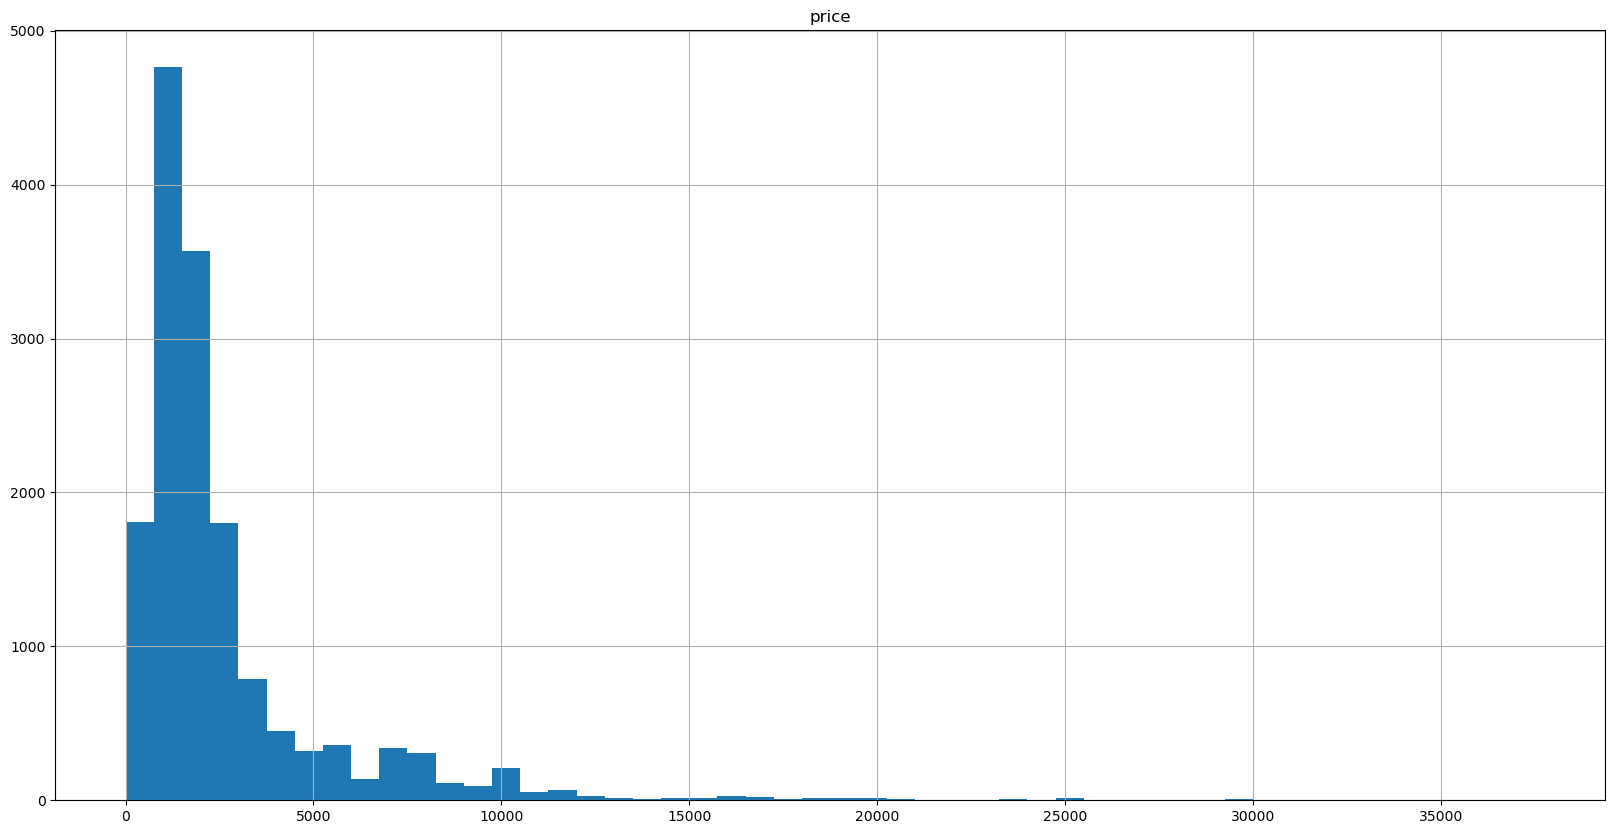

In [13]:
df.hist(figsize=(20, 10), bins=50)

In [14]:
df.shape

(15417, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 1 to 15417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       15417 non-null  object 
 1   latitude   15417 non-null  object 
 2   longitude  15417 non-null  object 
 3   category   15417 non-null  object 
 4   commodity  15417 non-null  object 
 5   pricetype  15417 non-null  object 
 6   price      15417 non-null  float64
dtypes: float64(1), object(6)
memory usage: 843.2+ KB


In [16]:
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

In [17]:
print(df.dtypes)

date          object
latitude     float64
longitude    float64
category      object
commodity     object
pricetype     object
price        float64
dtype: object


In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['category'].value_counts()

cereals and tubers       8856
non-food                 2431
pulses and nuts          1318
oil and fats             1276
vegetables and fruits     666
miscellaneous food        336
meat, fish and eggs       274
milk and dairy            260
Name: category, dtype: int64

In [20]:
df['commodity'].value_counts()

Maize flour                 1709
Maize (white)               1585
Sorghum                     1520
Cassava flour               1464
Beans                       1318
Oil (vegetable)             1276
Millet                      1037
Maize                        736
Plantains                    390
Salt                         336
Millet flour                 331
Cassava (fresh)              279
Leafy vegetables             276
Fish (dry)                   274
Milk (fresh)                 260
Rice                         195
Laundry soap                 182
Firewood                     179
Sanitary pads                169
Charcoal                     166
Underwear                    163
Jerrycan (20 L)              117
Mug (plastic)                115
Wooden mingle                113
Jerrycan (5 L)               112
Plate (plastic)              111
Serving spoon                109
Pen                           97
Pencil                        94
Basin                         92
Torch     

In [21]:
df[['date', 'commodity']].value_counts()

date        commodity      
2022-09-15  Oil (vegetable)    40
2022-12-15  Oil (vegetable)    40
            Maize flour        40
            Maize (white)      40
2022-10-15  Oil (vegetable)    40
                               ..
2010-08-15  Rice                1
2019-06-15  Rice                1
2022-05-15  Rice                1
2014-12-15  Rice                1
2020-04-15  Rice                1
Length: 1900, dtype: int64

In [22]:
df

,date,latitude,longitude,category,commodity,pricetype,price
1,2006-01-15,0.467000,34.090000,cereals and tubers,Maize,Wholesale,298.40
2,2006-01-15,0.322805,32.574841,cereals and tubers,Maize,Wholesale,345.42
3,2006-01-15,0.322805,32.574841,cereals and tubers,Rice,Wholesale,1013.40
4,2006-01-15,2.235000,32.909722,cereals and tubers,Maize,Wholesale,247.76
5,2006-02-15,0.467000,34.090000,cereals and tubers,Maize,Wholesale,296.59
...,...,...,...,...,...,...,...
15413,2023-01-15,3.362175,31.351966,non-food,Laundry soap,Retail,5500.00
15414,2023-01-15,3.362175,31.351966,non-food,Sanitary pads,Retail,3750.00
15415,2023-01-15,3.362175,31.351966,non-food,Underwear,Retail,1500.00
15416,2023-01-15,3.362175,31.351966,oil and fats,Oil (vegetable),Retail,8250.00


In [23]:
wholesale_df=df[df['pricetype']=='Wholesale'].reset_index(drop=True)
retail_df=df[df['pricetype']=='Retail'].reset_index(drop=True)

In [24]:
wholesale_df=wholesale_df.drop(['pricetype'], axis=1)

In [25]:
retail_df=retail_df.drop(columns=['pricetype'])

In [28]:
cereals_tuber_wholesale_df=wholesale_df[wholesale_df['category']=='cereals and tubers'].reset_index(drop=True)
cereals_tuber_retail_df=retail_df[retail_df['category']=='cereals and tubers'].reset_index(drop=True)

In [33]:
cereals_tuber_wholesale_df=cereals_tuber_wholesale_df.drop(columns=['category'])
cereals_tuber_retail_df=cereals_tuber_retail_df.drop(columns=['category'])

In [34]:
cereals_tuber_wholesale_df

,date,latitude,longitude,commodity,price
0,2006-01-15,0.467000,34.090000,Maize,298.40
1,2006-01-15,0.322805,32.574841,Maize,345.42
2,2006-01-15,0.322805,32.574841,Rice,1013.40
3,2006-01-15,2.235000,32.909722,Maize,247.76
4,2006-02-15,0.467000,34.090000,Maize,296.59
...,...,...,...,...,...
946,2022-05-15,-1.250000,29.990000,Maize,1365.58
947,2022-05-15,0.322805,32.574841,Maize,1248.98
948,2022-05-15,0.322805,32.574841,Rice,3296.23
949,2022-05-15,2.235000,32.909722,Maize,1190.64


In [35]:
cereals_tuber_retail_df

,date,latitude,longitude,commodity,price
0,2008-07-15,0.322805,32.574841,Cassava flour,700.00
1,2008-08-15,0.322805,32.574841,Cassava flour,715.38
2,2008-09-15,0.322805,32.574841,Cassava flour,744.44
3,2008-10-15,0.322805,32.574841,Cassava flour,710.00
4,2008-11-15,0.322805,32.574841,Cassava flour,787.50
...,...,...,...,...,...
7900,2023-01-15,3.362175,31.351966,Cassava (fresh),597.00
7901,2023-01-15,3.362175,31.351966,Maize (white),1750.00
7902,2023-01-15,3.362175,31.351966,Maize flour,3500.00
7903,2023-01-15,3.362175,31.351966,Millet flour,5500.00


In [37]:
cereals_tuber_wholesale_df['commodity'].value_counts()

Maize            549
Cassava flour    207
Rice             195
Name: commodity, dtype: int64

In [38]:
cereals_tuber_retail_df['commodity'].value_counts()

Maize flour        1709
Maize (white)      1585
Sorghum            1520
Cassava flour      1257
Millet             1037
Millet flour        331
Cassava (fresh)     279
Maize               187
Name: commodity, dtype: int64

In [109]:
wholesale_df['commodity'].value_counts()

Maize            549
Beans            309
Cassava flour    207
Rice             195
Plantains        195
Name: commodity, dtype: int64

In [111]:
retail_df['category'].value_counts()

cereals and tubers       7905
non-food                 2431
oil and fats             1276
pulses and nuts          1009
vegetables and fruits     471
miscellaneous food        336
meat, fish and eggs       274
milk and dairy            260
Name: category, dtype: int64

In [25]:
df['pricetype'].value_counts()

Retail       13962
Wholesale     1455
Name: pricetype, dtype: int64

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

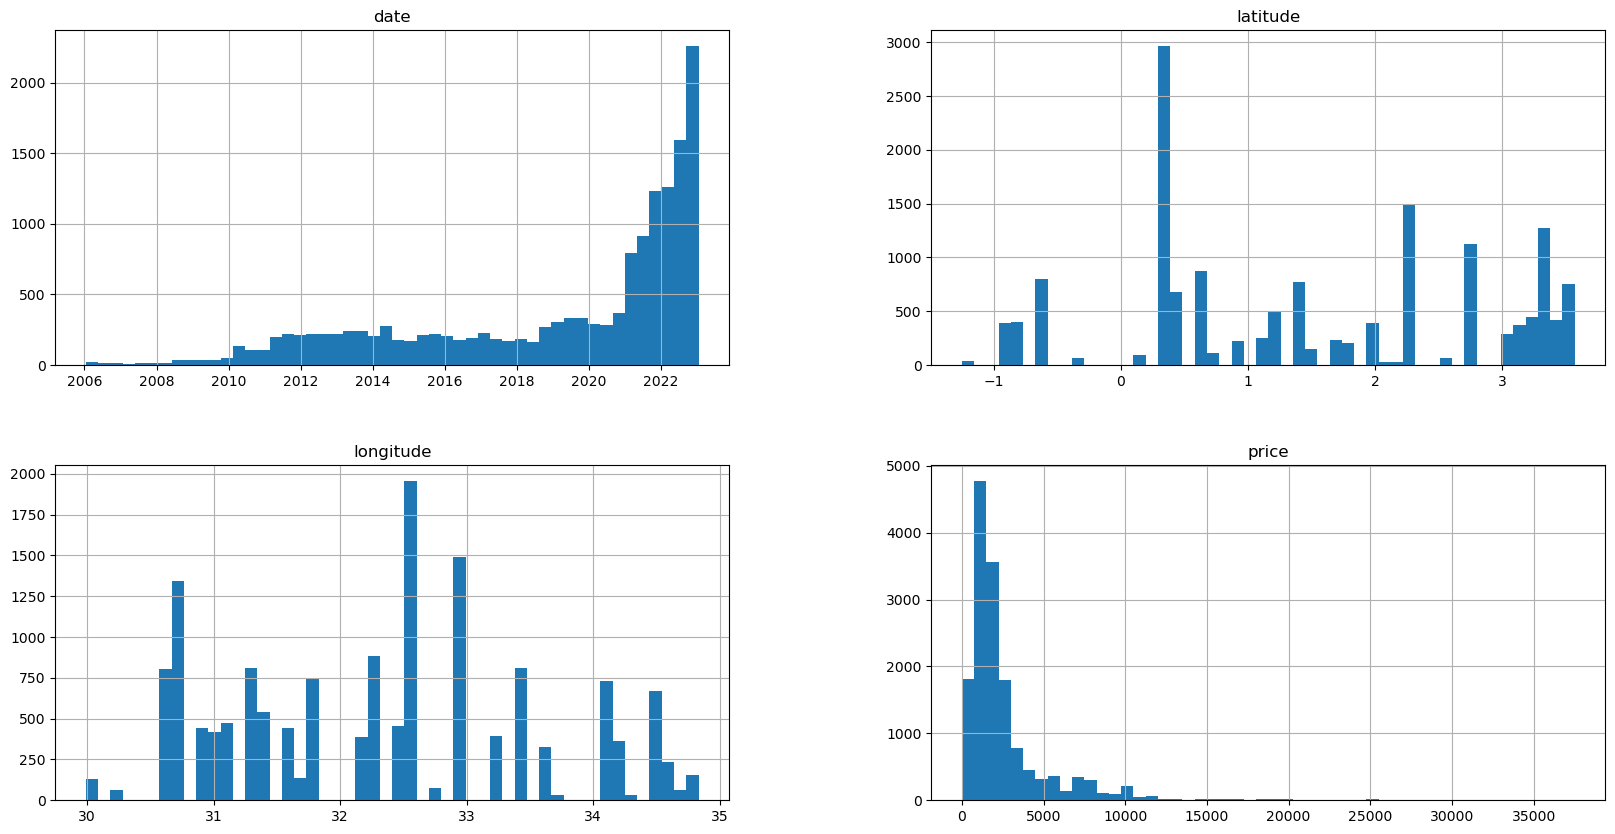

In [26]:
df.hist(figsize = (20,10), bins = 50)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

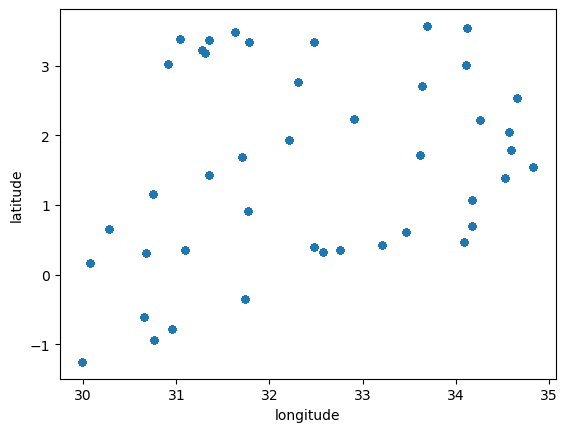

In [27]:
df.plot(kind='scatter', x='longitude', y='latitude')

In [28]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending = False)

price        1.000000
latitude     0.040492
longitude   -0.132231
Name: price, dtype: float64

In [41]:
df[['retailprice', 'wholesaleprice']] = df['pricetype'].str.extract(r'retailprice: (\d+\.?\d*)\s+wholesaleprice: (\d+\.?\d*)')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 1 to 15417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15417 non-null  datetime64[ns]
 1   latitude        15417 non-null  float64       
 2   longitude       15417 non-null  float64       
 3   category        15417 non-null  object        
 4   commodity       15417 non-null  object        
 5   pricetype       15417 non-null  object        
 6   price           15417 non-null  float64       
 7   retailprice     0 non-null      object        
 8   wholesaleprice  0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.1+ MB


In [29]:
dummies = pd.get_dummies(df.category, df.commodity, df.pricetype)
dummies

,"1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectcereals and tubers","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmeat, fish and eggs","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmilk and dairy","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmiscellaneous food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectnon-food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectoil and fats","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectpulses and nuts","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectvegetables and fruits"
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15413,0,0,0,0,1,0,0,0
15414,0,0,0,0,1,0,0,0
15415,0,0,0,0,1,0,0,0
15416,0,0,0,0,0,1,0,0


In [30]:
df_dummies = pd.concat([df, dummies], axis='columns')
df_dummies.head()
df_clean=df_dummies.drop(['category', 'commodity', 'pricetype'], axis=1)
df_clean.head()

,date,latitude,longitude,price,"1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectcereals and tubers","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmeat, fish and eggs","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmilk and dairy","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmiscellaneous food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectnon-food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectoil and fats","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectpulses and nuts","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectvegetables and fruits"
1,2006-01-15,0.467000,34.090000,298.40,1,0,0,0,0,0,0,0
2,2006-01-15,0.322805,32.574841,345.42,1,0,0,0,0,0,0,0
3,2006-01-15,0.322805,32.574841,1013.40,1,0,0,0,0,0,0,0
4,2006-01-15,2.235000,32.909722,247.76,1,0,0,0,0,0,0,0
5,2006-02-15,0.467000,34.090000,296.59,1,0,0,0,0,0,0,0


In [31]:
df_clean.head()

,date,latitude,longitude,price,"1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectcereals and tubers","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmeat, fish and eggs","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmilk and dairy","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectmiscellaneous food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectnon-food","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectoil and fats","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectpulses and nuts","1 Maize\n2 Maize\n3 Rice\n4 Maize\n5 Maize\n ... \n15413 Laundry soap\n15414 Sanitary pads\n15415 Underwear\n15416 Oil (vegetable)\n15417 Leafy vegetables\nName: commodity, Length: 15417, dtype: object1 Wholesale\n2 Wholesale\n3 Wholesale\n4 Wholesale\n5 Wholesale\n ... \n15413 Retail\n15414 Retail\n15415 Retail\n15416 Retail\n15417 Retail\nName: pricetype, Length: 15417, dtype: objectvegetables and fruits"
1,2006-01-15,0.467000,34.090000,298.40,1,0,0,0,0,0,0,0
2,2006-01-15,0.322805,32.574841,345.42,1,0,0,0,0,0,0,0
3,2006-01-15,0.322805,32.574841,1013.40,1,0,0,0,0,0,0,0
4,2006-01-15,2.235000,32.909722,247.76,1,0,0,0,0,0,0,0
5,2006-02-15,0.467000,34.090000,296.59,1,0,0,0,0,0,0,0
